#### Importar Librerías

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [ ]:
# Importar datos
df_donantesi = pd.read_csv('./Archivos_Cliente/Base_donantes.csv', encoding='latin-1')
df_donantesi.set_index('PSN', inplace=True)
df_donantesi.head()

: 

#### Preprocesamiento de Datos

In [ ]:
# Remover los registros que tienen "N° de error" en la columna Fecha Aniversario Pago
df_donantesi = df_donantesi[df_donantesi['Fecha Aniversario Pago']!='Nº de error']
# Remover los registros inactivos
df_donantesi = df_donantesi[df_donantesi['Donante Activo']==1]
# Remover registros menores de edad
df_donantesi = df_donantesi[df_donantesi['Edad']>=18]
# Remover registros mayores de 90 años
df_donantesi = df_donantesi[df_donantesi['Edad']<=90]
# Reemplazar textos de la cantidad de hijos
df_donantesi['Cantidad de Hijos'] = df_donantesi['Cantidad de Hijos'].replace('mas de 10', 10)
df_donantesi['Cantidad de Hijos'] = df_donantesi['Cantidad de Hijos'].astype(float)
# Llenar faltantes de tiene hijos
df_donantesi['Tiene hijos'] = np.where(df_donantesi['Cantidad de Hijos']>0.0, 'Si', 'No')
# Llenar faltantes de cantidad de hijos
df_donantesi['Cantidad de Hijos'] = np.where(df_donantesi['Tiene hijos']=='No', 0, df_donantesi['Cantidad de Hijos'])
# Cambiar tipos de dato
df_donantesi['Fecha de Captación'] = pd.to_datetime(df_donantesi['Fecha de Captación'])
df_donantesi['Tipo de registro del contacto'] = df_donantesi['Tipo de registro del contacto'].astype('category')
df_donantesi['Fecha de nacimiento'] = pd.to_datetime(df_donantesi['Fecha de nacimiento'])
df_donantesi['Fecha Aniversario Pago'] = pd.to_datetime(df_donantesi['Fecha Aniversario Pago'])
df_donantesi['Género'] = df_donantesi['Género'].astype('category')
df_donantesi['Estado Civil'] = df_donantesi['Estado Civil'].astype('category')
df_donantesi['Tiene hijos'] = df_donantesi['Tiene hijos'].astype('category')
# Reemplazar NaNs en Fecha Aniversario Pago con la Fecha de Captacion
df_donantesi['Fecha Aniversario Pago'] = np.where(df_donantesi['Fecha Aniversario Pago'].isna(), df_donantesi['Fecha de Captación'], df_donantesi['Fecha Aniversario Pago'])
# Cambiar el año de Fecha Aniversario Pago por 2023
df_donantesi['Fecha Aniversario Pago'] = df_donantesi['Fecha Aniversario Pago'].apply(lambda x: x.replace(year=2023))
# Obtener mes de la fecha actual
today = dt.datetime.now().month
# Remover registros con menos de 3 meses de fecha de captación
df_donantesi = df_donantesi[df_donantesi['Fecha de Captación']<dt.datetime(2023, today-3, 1) - dt.timedelta(days=90)]
# Corregir Churn Probability
df_donantesi['Churn Probability'] = np.where(df_donantesi['Churn Probability']>1, df_donantesi['Churn Probability']/100, df_donantesi['Churn Probability'])
# Corregir Lapsed Probability
df_donantesi['Lapsed Probability'] = np.where(df_donantesi['Lapsed Probability']>1, df_donantesi['Lapsed Probability']/100, df_donantesi['Lapsed Probability'])


: 

In [ ]:
# Evaluar datos faltantes
for col in df_donantesi.columns:
    print(f'La columna {col} tiene {df_donantesi[col].isna().sum()}')

: 

In [5]:
# Obtener el tipo de dato de las columnas
for col in df_donantesi.columns:
    print(f'La columna {col}: {df_donantesi[col].dtype}')

La columna Tipo de registro del contacto: category
La columna Fecha de nacimiento: datetime64[ns]
La columna Fecha Aniversario Pago: datetime64[ns]
La columna Edad: float64
La columna Fecha de Captación: datetime64[ns]
La columna Monto Actual: float64
La columna Género: category
La columna Estado Civil: category
La columna Cantidad de Hijos: float64
La columna Tiene hijos: category
La columna Ocupación: object
La columna Churn Probability: float64
La columna Lapsed Probability: float64
La columna RFM Segmento Actual: object
La columna Otra Clasificación RFM Actual: object
La columna Cantidad Cuotas Pagadas Global: int64
La columna Cantidad Cuotas No Pagadas Global: int64
La columna Campaña Inicial: Nombre: object
La columna Donante Activo: int64


In [ ]:
# Obtener el tipo de dato de las columnas
for col in df_donantesi.columns:
    print(f'La columna {col}: {df_donantesi[col].dtype}')

: 

In [ ]:
df_donantesi.describe()

: 

In [ ]:
# Graficar histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(data=df_donantesi, x='Edad', bins=20)
plt.title('Histograma de Edades')
plt.show()

: 

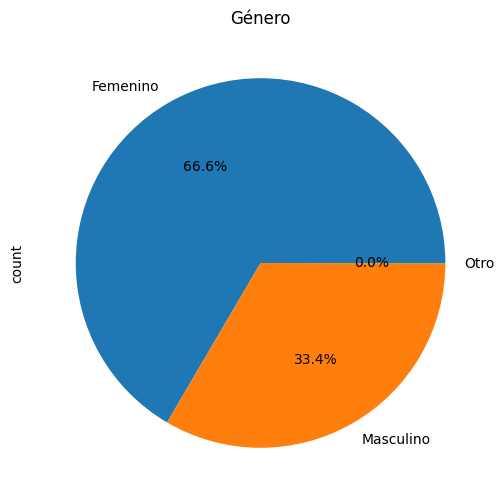

In [8]:
# Grafica de pie para el género
plt.figure(figsize=(10, 6))
df_donantesi['Género'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Género')
plt.show()

In [ ]:
# Calcular edad del donante
df_donantesi['Edad_donacion'] = dt.datetime.now().year - df_donantesi['Fecha de Captación'].dt.year
# Graficar histograma de edades de donacion
plt.figure(figsize=(10, 6))
sns.histplot(data=df_donantesi, x='Edad_donacion', bins=20)
plt.title('Histograma de Edades de Donación')
plt.show()

: 

In [ ]:
# Pandas profiling para los datos
from ydata_profiling import ProfileReport

profile = ProfileReport(df_donantesi, title='Pandas Profiling Report', explorative=True)
profile.to_file('Pandas Profiling Report.html')

: 

#### Exploración Datos de Transacciones

In [ ]:
# Importar datos de transacciones individuales
df_transi = pd.read_csv('./Archivos_Cliente/Transacciones_Individuales.csv', sep=';', encoding='latin-1')
df_transi.head()

: 

In [ ]:
# Cambiar tipos de dato
df_transi['Fecha de Donación'] = pd.to_datetime(df_transi['Fecha de Donación'])
df_transi['Etapa'] = df_transi['Etapa'].astype('category')
df_transi['Importe'] = df_transi['Importe'].str.replace(',','.')
df_transi['Importe'] = df_transi['Importe'].astype(float)
df_transi['Canal de la Campaña'] = df_transi['Canal de la Campaña'].astype('category')
df_transi['Tipo de registro'] = df_transi['Tipo de registro'].astype('category')
df_transi['Medio de Pago'] = df_transi['Medio de Pago'].astype('category')
df_transi['Tipo de Compromiso'] = df_transi['Tipo de Compromiso'].astype('category')
df_transi['Fecha de Registro Contable'] = pd.to_datetime(df_transi['Fecha de Registro Contable'], format='mixed')
df_transi['Fecha efectiva de primer cobro'] = pd.to_datetime(df_transi['Fecha efectiva de primer cobro'])
df_transi['Fecha de última donación'] = pd.to_datetime(df_transi['Fecha de última donación'], format='mixed')
df_transi['Estado/Tipo'] = df_transi['Estado/Tipo'].astype('category')


: 

In [ ]:
# Tipos de transacciones
df_transi['Etapa'].value_counts()

: 

In [ ]:
# Filtrar donaciones del futuro
df_trans_futuras = df_transi[df_transi['Fecha de Donación']>dt.datetime.now()]
df_trans_futuras['Etapa'].value_counts()

: 

In [ ]:
# Filtrar transacciones efectivas
df_trans_cobradas = df_transi[df_transi['Etapa']=='Cobrada']
df_trans_cobradas.describe()

: 

In [ ]:
# Graficar de línea para el importe en el tiempo
plt.figure(figsize=(10, 6))
df_trans_cobradas.groupby('Fecha de Donación')['Importe'].sum().plot()
plt.title('Importe en el tiempo')
plt.show()

: 

In [ ]:
df = df_trans_cobradas.join(df_donantesi, on='PSN', how='inner')
df.head()

: 

In [ ]:
# Boxplot de promedio de importe por género
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Género', y='Importe')
plt.title('Boxplot de promedio de importe por género')
plt.show()

: 

In [ ]:
# Gráfica de donantes por fecha de captación
plt.figure(figsize=(10, 6))
df_donantesi.reset_index(inplace=True)
df_donantesi.groupby('Fecha de Captación')['PSN'].count().plot()
plt.title('Donantes por fecha de captación')
plt.show()

: 